In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE

import time

In [2]:
df_train=pd.read_csv("./data/train.csv",index_col=0)
df_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [21]:
df_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.00,100000.000,100000.000,100000.000,100000.000,100000.00,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,0.258,0.432,0.114,0.591,0.600,0.161,0.731,1.229,0.903,0.940,0.314,0.404,0.461,0.076,2.597,1.242,0.365,0.740,0.471,1.565,0.243,0.662,0.185,0.388,1.04,0.409,0.354,0.301,1.106,0.17,0.294,1.372,0.278,0.612,1.122,0.909,0.117,0.398,2.997,0.675,0.712,0.582,0.529,0.616,0.135,0.359,0.517,0.390,0.971,0.557
std,0.929,1.978,0.520,1.845,2.786,0.601,2.343,2.693,3.415,1.904,1.121,1.011,1.129,0.359,4.655,2.160,1.284,1.819,1.096,4.749,0.927,2.183,0.554,1.216,2.54,1.322,1.492,1.592,1.880,0.74,1.353,3.319,1.461,2.284,2.493,2.952,0.411,1.095,5.387,3.732,1.722,2.003,2.301,2.361,0.628,1.464,2.171,1.487,2.577,1.681
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-2.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,-1.000,-1.000,-2.000,0.000,0.000,-2.000,0.000,0.000,-8.000,-5.000,0.000,0.000,-2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,3.000,2.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.00,0.000,0.000,0.000,2.000,0.00,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,4.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
max,10.000,31.000,6.000,26.000,38.000,10.000,27.000,31.000,39.000,17.000,16.000,12.000,11.000,3.000,51.000,20.000,19.000,16.000,13.000,55.000,17.000,36.000,4.000,19.000,34.00,23.000,21.000,31.000,23.000,13.00,41.000,46.000,27.000,24.000,25.000,43.000,3.000,14.000,66.000,66.000,21.000,32.000,37.000,33.000,9.000,26.000,29.000,25.000,44.000,20.000


In [22]:
#no null values
df_train.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
target        0
dtype: int64

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   feature_0   100000 non-null  int64 
 1   feature_1   100000 non-null  int64 
 2   feature_2   100000 non-null  int64 
 3   feature_3   100000 non-null  int64 
 4   feature_4   100000 non-null  int64 
 5   feature_5   100000 non-null  int64 
 6   feature_6   100000 non-null  int64 
 7   feature_7   100000 non-null  int64 
 8   feature_8   100000 non-null  int64 
 9   feature_9   100000 non-null  int64 
 10  feature_10  100000 non-null  int64 
 11  feature_11  100000 non-null  int64 
 12  feature_12  100000 non-null  int64 
 13  feature_13  100000 non-null  int64 
 14  feature_14  100000 non-null  int64 
 15  feature_15  100000 non-null  int64 
 16  feature_16  100000 non-null  int64 
 17  feature_17  100000 non-null  int64 
 18  feature_18  100000 non-null  int64 
 19  feature_19  100000 non-n

In [23]:
#no duplicates
df_train.duplicated().sum()

0

In [24]:
#f2 f13 f22 f36 can be categorical
for column in df_train.columns:
    n=df_train[column].value_counts().size
    print("{} unique values: {}".format(column,n))

feature_0 unique values: 11
feature_1 unique values: 31
feature_2 unique values: 7
feature_3 unique values: 26
feature_4 unique values: 38
feature_5 unique values: 11
feature_6 unique values: 28
feature_7 unique values: 32
feature_8 unique values: 37
feature_9 unique values: 18
feature_10 unique values: 17
feature_11 unique values: 13
feature_12 unique values: 12
feature_13 unique values: 4
feature_14 unique values: 52
feature_15 unique values: 21
feature_16 unique values: 20
feature_17 unique values: 17
feature_18 unique values: 14
feature_19 unique values: 58
feature_20 unique values: 18
feature_21 unique values: 36
feature_22 unique values: 5
feature_23 unique values: 20
feature_24 unique values: 35
feature_25 unique values: 23
feature_26 unique values: 22
feature_27 unique values: 32
feature_28 unique values: 24
feature_29 unique values: 14
feature_30 unique values: 43
feature_31 unique values: 46
feature_32 unique values: 30
feature_33 unique values: 25
feature_34 unique values: 2

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

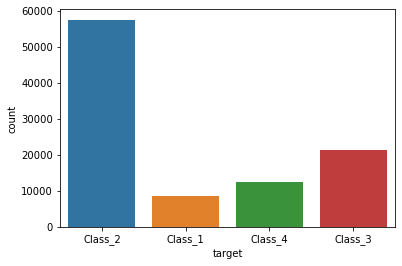

In [25]:
#very imbalanced dataset
sns.countplot(df_train["target"])
df_train["target"].value_counts()

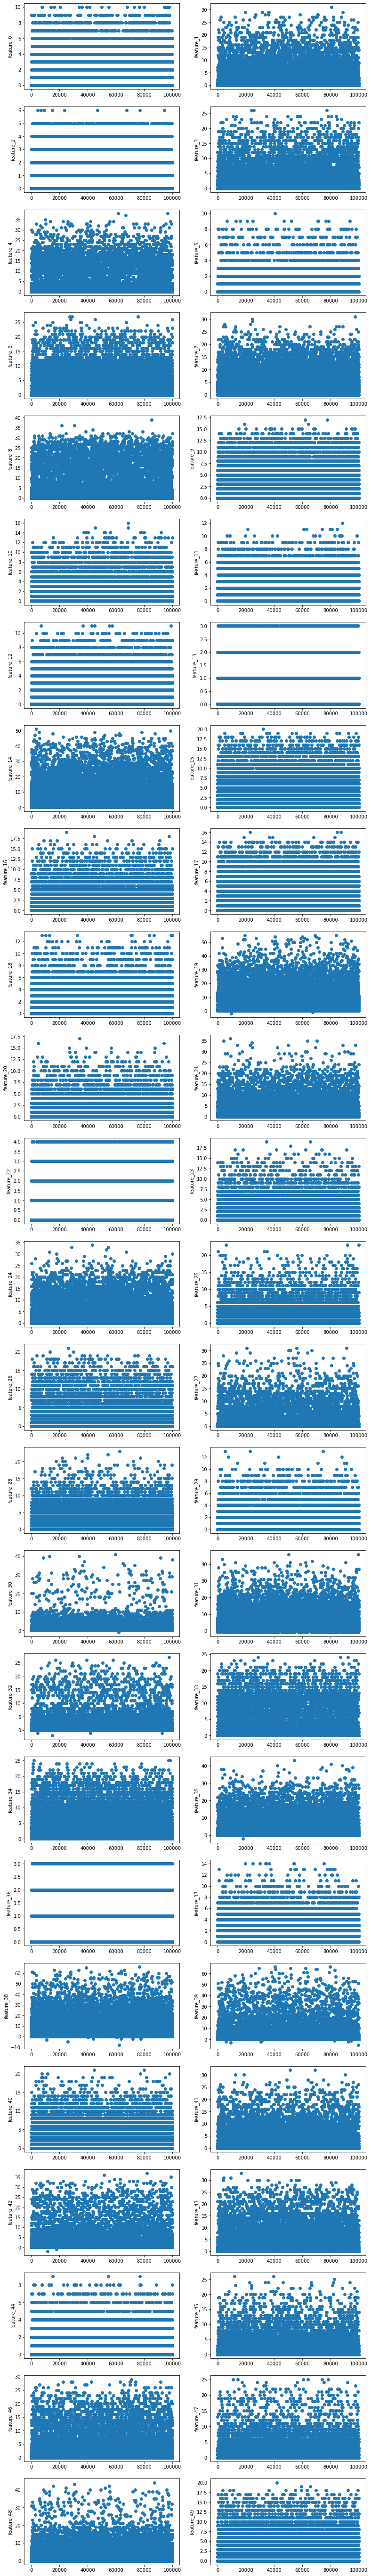

In [6]:
fig,axes=plt.subplots(25,2,figsize=(13,100))
for column,ax in zip(df_train.columns,axes.ravel()):
    ax.scatter(range(len(df_train[column])),df_train[column].to_numpy())
    ax.set_xlabel("")
    ax.set_ylabel(column)

<AxesSubplot:>

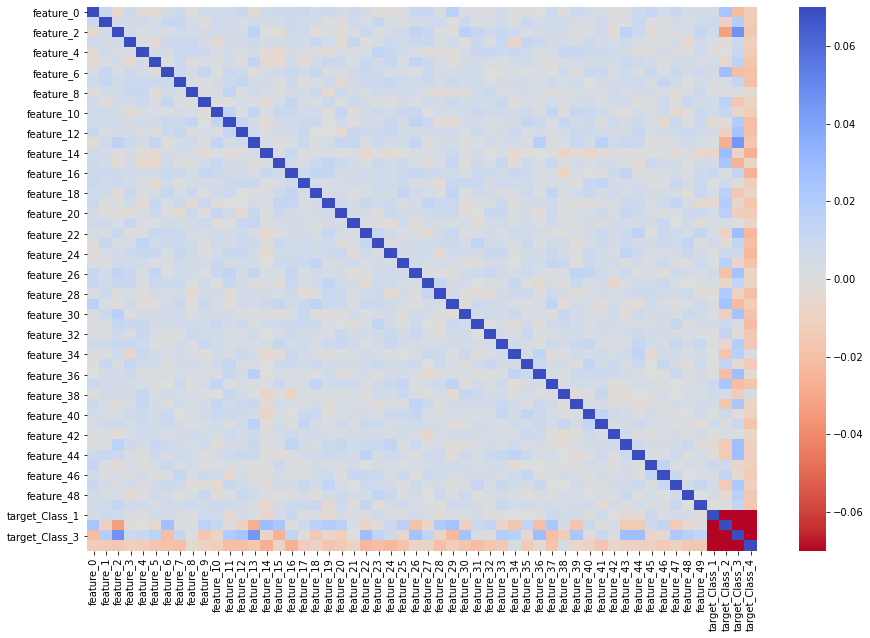

In [26]:
#we dont see high multiple corr
corrs=pd.get_dummies(df_train,columns=["target"]).corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrs, cmap="coolwarm_r",vmin=-0.07,vmax=0.07)

<AxesSubplot:>

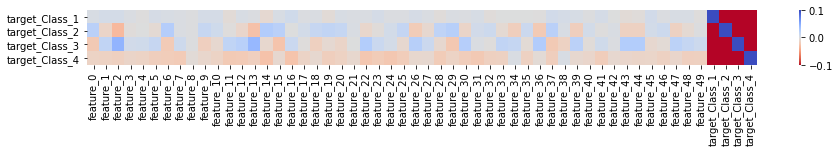

In [27]:
#class1 is barely correlated with anything
plt.figure(figsize=(15,1))
sns.heatmap(corrs[-4:], cmap="coolwarm_r",vmin=-0.1,vmax=0.1)

In [28]:
#most important features: f2 f13 f14  f16
#we remember that f2 f13 f22 f36 can be categorical
for arr in corrs[-4:].to_numpy():
    print(np.abs(arr)[:-4].argsort()[-5:][::-1])

[16 37 45  1  2]
[ 2 14 13  6 29]
[ 2 13 36 22 43]
[14 16 22 24 31]


<AxesSubplot:xlabel='target', ylabel='feature_16'>

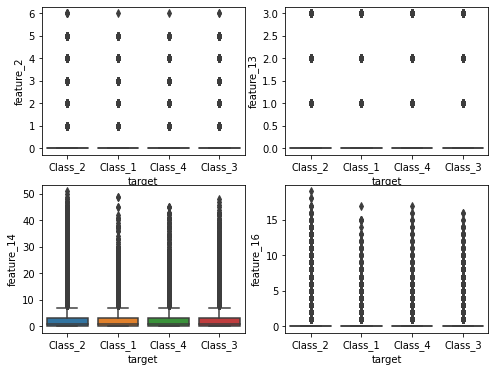

In [29]:
#boxplot doesnt tell us anything
fig,axes=plt.subplots(2,2,figsize=(8,6))
axes=axes.ravel()
sns.boxplot(x="target",y="feature_2",data=df_train,ax=axes[0])
sns.boxplot(x="target",y="feature_13",data=df_train,ax=axes[1])
sns.boxplot(x="target",y="feature_14",data=df_train,ax=axes[2])
sns.boxplot(x="target",y="feature_16",data=df_train,ax=axes[3])

In [30]:
df_f2=pd.DataFrame(columns=np.sort(df_train["feature_2"].unique()))
df_f2

,0,1,2,3,4,5,6


In [31]:
# percent of rows in each class with value in features

targets_all=["Class_1","Class_2","Class_3","Class_4"]
features=["feature_2","feature_13","feature_14","feature_16"]

df_f2=pd.DataFrame(columns=np.sort(df_train["feature_2"].unique()))
df_f13=pd.DataFrame(columns=np.sort(df_train["feature_13"].unique()))
df_f14=pd.DataFrame(columns=np.sort(df_train["feature_14"].unique()))
df_f16=pd.DataFrame(columns=np.sort(df_train["feature_16"].unique()))
dfs_features=[df_f2,df_f13,df_f14,df_f16]

for target in targets_all:
    cl_1=df_train[features].loc[df_train["target"]==target]
    num_rows=len(cl_1.index)
    for feature,df in zip(features,dfs_features):
        df.loc[target]=cl_1[feature].value_counts()/num_rows*100

pd.set_option("precision", 3)
pd.set_option("display.max_columns", 100)
for df,feature in zip(dfs_features,features):
    print('\n\n\n\n{}\n {}'.format(feature,df.fillna(0)))
    
#cant say much after looking at this
#I dont know what to do about outliers





feature_2
               0      1      2      3      4      5      6
Class_1  93.039  4.028  1.390  0.695  0.530  0.306  0.012
Class_2  94.428  3.252  1.141  0.543  0.395  0.233  0.009
Class_3  90.574  5.803  1.872  0.803  0.621  0.317  0.009
Class_4  94.489  3.446  1.040  0.532  0.294  0.191  0.008




feature_13
               0      1      2      3
Class_1  94.841  3.015  1.649  0.495
Class_2  95.522  2.694  1.324  0.461
Class_3  92.768  4.435  2.213  0.584
Class_4  95.823  2.597  1.271  0.310




feature_14
              0       1       2      3      4      5      6      7      8   \
Class_1  41.991  17.067  11.449  6.985  6.090  3.628  2.120  1.837  1.790   
Class_2  39.825  16.730  12.326  7.315  6.317  3.694  2.310  2.104  1.645   
Class_3  45.205  16.447  10.616  6.181  5.107  3.105  1.975  1.811  1.522   
Class_4  44.525  16.454  12.205  7.584  5.146  3.041  2.049  1.660  1.406   

            9      10     11     12     13     14     15     16     17     18  \
Class_1  1.

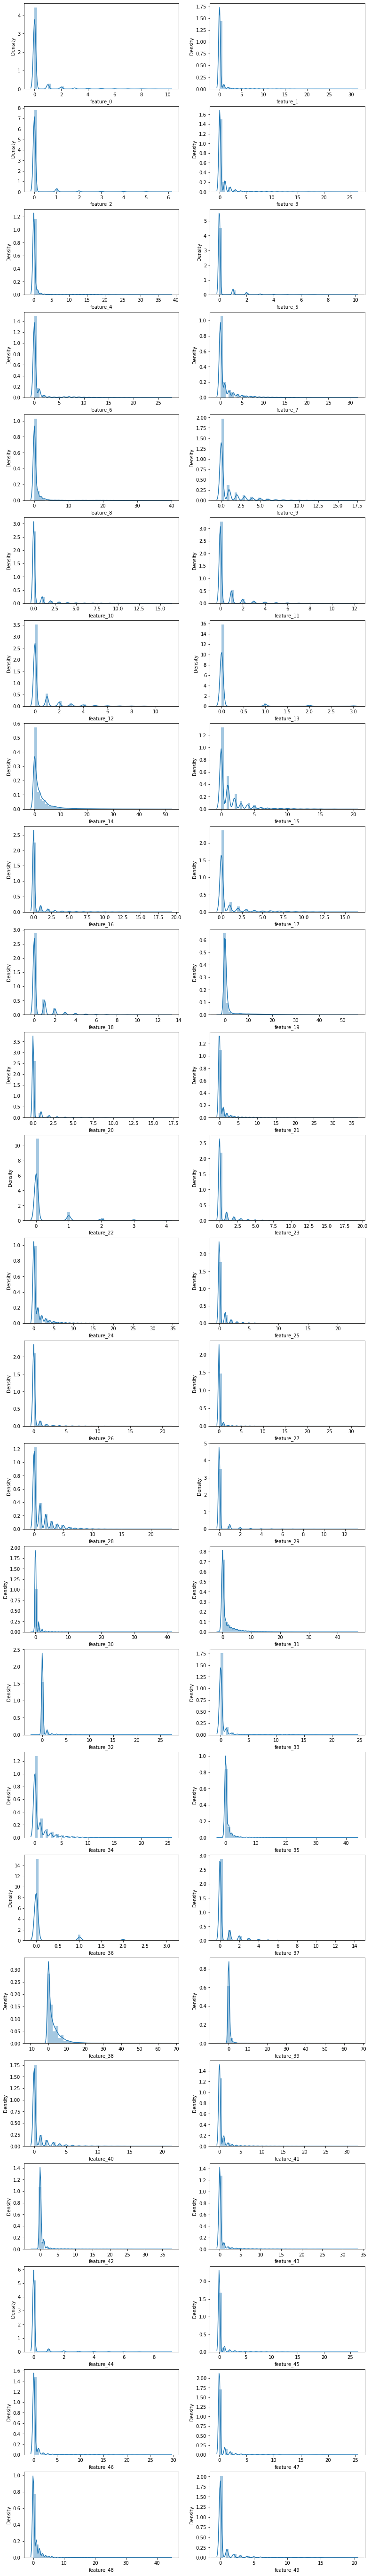

In [32]:
fig,axes=plt.subplots(25,2,figsize=(13,100))
for column,ax in zip(df_train.columns,axes.ravel()):
    sns.distplot(df_train[column],ax=ax)

In [33]:
#we can see that all features have high positive skew and kurtosis
print("Kurtosis\n")
print(df_train.kurtosis())
print("\n\n\nSkewness\n")
print(df_train.skew())

Kurtosis

feature_0      30.882
feature_1      59.036
feature_2      40.419
feature_3      43.937
feature_4      44.906
feature_5      47.397
feature_6      24.749
feature_7      15.902
feature_8      32.255
feature_9      10.345
feature_10     40.673
feature_11     17.974
feature_12     15.630
feature_13     31.765
feature_14     19.205
feature_15     12.383
feature_16     42.370
feature_17     12.371
feature_18     21.346
feature_19     24.118
feature_20     56.630
feature_21     46.227
feature_22     15.728
feature_23     39.364
feature_24     25.958
feature_25     55.870
feature_26     52.158
feature_27     92.575
feature_28     12.590
feature_29     60.680
feature_30    241.710
feature_31     25.623
feature_32    105.789
feature_33     27.377
feature_34     19.165
feature_35     35.323
feature_36     18.568
feature_37     24.998
feature_38     23.808
feature_39     95.229
feature_40     20.826
feature_41     49.859
feature_42     73.457
feature_43     45.240
feature_44     48.954


In [5]:
#some data transformation to fix skewness and curtosis a bit
newdf_train=pd.read_csv("./data/train.csv",index_col=0)
for column in newdf_train.columns[:-1]:
    temp_column=newdf_train[column].to_numpy()
    temp_column=np.log(np.log(np.log(np.exp(temp_column)+1)+1)+1)
    newdf_train[column]=temp_column

In [6]:
#looks a bit better now
print("Kurtosis\n")
print(newdf_train.kurtosis())
print("\n\n\nSkewness\n")
print(newdf_train.skew())

Kurtosis

feature_0     13.179774
feature_1     16.763428
feature_2     25.383778
feature_3      7.426969
feature_4     16.389305
feature_5     16.614545
feature_6      7.081475
feature_7      1.557459
feature_8      9.494030
feature_9      1.490653
feature_10    12.734880
feature_11     5.719199
feature_12     4.821701
feature_13    25.626732
feature_14    -0.296639
feature_15     0.708586
feature_16    11.164976
feature_17     3.470533
feature_18     4.450194
feature_19     4.098618
feature_20    15.967203
feature_21     7.472610
feature_22     9.797773
feature_23     8.822796
feature_24     2.744351
feature_25     9.904295
feature_26    16.081104
feature_27    24.395032
feature_28     0.520293
feature_29    22.726365
feature_30    18.272222
feature_31     1.706347
feature_32    24.982775
feature_33    11.075421
feature_34     2.020870
feature_35     6.596282
feature_36    13.763465
feature_37     6.726744
feature_38    -0.640616
feature_39    18.730669
feature_40     3.336476
featur

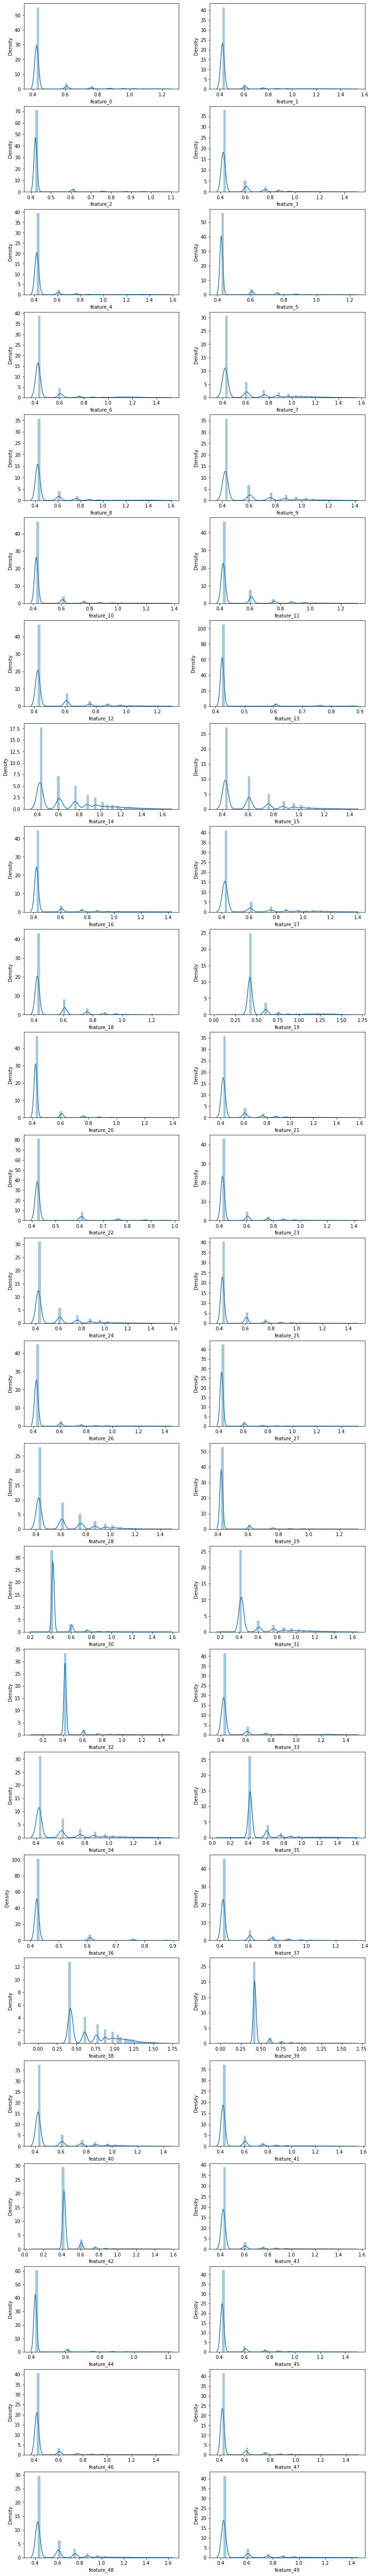

In [7]:
fig,axes=plt.subplots(25,2,figsize=(13,100))
for column,ax in zip(newdf_train.columns,axes.ravel()):
    sns.distplot(newdf_train[column],ax=ax)

In [11]:
X=newdf_train.drop("target",axis=1)
y=newdf_train["target"]



t0 = time.time()
X_reduced_pca=PCA(n_components=2,random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

t0 = time.time()
X_reduced_nmf=NMF(n_components=2,random_state=42).fit_transform(X.values)
t1 = time.time()
print("NMF took {:.2} s".format(t1 - t0))

PCA took 0.28 s
NMF took 2.2 s


In [20]:
#tsne takes too long on cpu
X_reduced_pca10=PCA(n_components=10,random_state=42).fit_transform(X.values)
t0 = time.time()
X_reduced_tsne=TSNE(n_components=2,random_state=42,n_jobs=-1).fit_transform(X_reduced_pca10)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 7e+02 s


In [ ]:
fig, axes=plt.subplots(2,1,figsize=(10,21))
axes=axes.ravel()
targets_all=["Class_1","Class_2","Class_3","Class_4"]
colors=["blue","red","green","yellow"]
#PCAscatter plot
for target,color in zip(targets_all,colors):
    axes[0].scatter(X_reduced_pca[y==target,0],X_reduced_pca[y==target,1],
                    c=color,label=target,s=1)
    
#NMFscatter plot
for target,color in zip(targets_all,colors):
    axes[1].scatter(X_reduced_nmf[y==target,0],X_reduced_nmf[y==target,1],
                    c=color,label=target,s=2)
    
#NMFscatter plot
for target,color in zip(targets_all,colors):
    axes[1].scatter(X_reduced_tsne[y==target,0],X_reduced_tsne[y==target,1],
                    c=color,label=target,s=2)
for ax in axes:
    ax.legend()